# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mohammad Amadeus Andika Fadhil
- **Email:** fadhilcr1@gmail.com
- **ID Dicoding:** Mohammad Amadeus Andika Fadhil

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan (jumlah order & revenue) departemen store Olist pada Januari 2018 ke Agustus 2018, dan bagaimana perubahannya dibandingkan periode sebelumnya?
- kategori produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana distribusi pelanggan berdasarkan state?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load Table Customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/Mazdeus/Analysis-Data-Brazilian-E-Commerce-Public-Dataset-by-Olist/refs/heads/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Load Table orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/Mazdeus/Analysis-Data-Brazilian-E-Commerce-Public-Dataset-by-Olist/refs/heads/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Load Table reviews
reviews_df = pd.read_csv("https://raw.githubusercontent.com/Mazdeus/Analysis-Data-Brazilian-E-Commerce-Public-Dataset-by-Olist/refs/heads/main/data/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
# Load Table payments
payments_df = pd.read_csv("https://raw.githubusercontent.com/Mazdeus/Analysis-Data-Brazilian-E-Commerce-Public-Dataset-by-Olist/refs/heads/main/data/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Load table items
items_df = pd.read_csv("https://raw.githubusercontent.com/Mazdeus/Analysis-Data-Brazilian-E-Commerce-Public-Dataset-by-Olist/refs/heads/main/data/order_items_dataset.csv")
items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
# Load table products
products_df = pd.read_csv("https://raw.githubusercontent.com/Mazdeus/Analysis-Data-Brazilian-E-Commerce-Public-Dataset-by-Olist/refs/heads/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# load table category
category_df = pd.read_csv("https://raw.githubusercontent.com/Mazdeus/Analysis-Data-Brazilian-E-Commerce-Public-Dataset-by-Olist/refs/heads/main/data/product_category_name_translation.csv")
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

Saya membutuhkan keempat data diatas untuk menjawab pertanyaan bisnis yang dibuat diawal, berikut ini rincian peran masing masing data:

- data customers : memuat lokasi pelanggan (kota & state). Digunakan untuk melihat distribusi pelanggan per wilayah dan mengidentifikasi area dengan jumlah pelanggan terbanyak.

- data orders : berisi informasi setiap pesanan, termasuk tanggal dan status. Dipakai untuk menghitung jumlah order per bulan 2018, membandingkan tren dengan tahun sebelumnya, dan memfilter hanya pesanan delivered untuk analisis penjualan.

- data reviews : Berisi skor ulasan dan komentar. Digunakan untuk menghitung rata-rata skor review per wilayah dan menemukan state dengan tingkat kepuasan terendah.

- data payments : Mencatat detail pembayaran, termasuk nilai (payment_value). Dipakai untuk menghitung revenue bulanan dari pesanan delivered dan membandingkan pendapatan antar periode.

- data items : Berisi detail produk pada setiap pesanan (harga, freight value). Digunakan untuk menghitung nilai transaksi per order, menganalisis biaya pengiriman, dan menghubungkan produk ke kategori.

- data products : Menyimpan atribut produk seperti ukuran, berat, dan kategori produk dalam bahasa Portugis. Dipakai untuk melihat karakteristik produk yang dijual dan menghubungkannya dengan data penjualan.

- data category : Berisi terjemahan kategori produk dari bahasa Portugis ke bahasa Inggris. Membantu mempermudah pembacaan kategori produk saat analisis tren penjualan per kategori atau perbandingan kinerja kategori.

### Assessing Data

#### Menilai data customers

In [9]:
# tipe data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
# cek missing value
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [11]:
# Cek duplikasi data
print("Jumlah duplikasi : ", customers_df.duplicated().sum())

Jumlah duplikasi :  0


In [12]:
# periksa parameter statistik
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:** Data customers
- Dataset memiliki 99.441 baris dan 5 kolom, tipe data sesuai (4 object, 1 int64).

- Tidak ada missing value pada seluruh kolom.

- Tidak ada duplikasi data.

- Nilai customer_zip_code_prefix bervariasi antara 1003 hingga 99990, dengan rata-rata sekitar 35137.

#### Menilai data orders

In [13]:
# cek tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
# cek missing value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [15]:
# cek duplikasi data
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


In [16]:
# cek parameter statistik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight**: data orders

- Dataset memiliki 99.441 baris dan 8 kolom, seluruh kolom bertipe object (termasuk kolom tanggal yang sebaiknya diubah menjadi tipe datetime untuk analisis waktu).

- Tidak ada duplikasi data.

- Ditemukan missing value pada:

 - order_approved_at (160 baris)

 - order_delivered_carrier_date (1.783 baris)

 - order_delivered_customer_date (2.965 baris)

 Tiga kolom diatas missing value karena beberapa pesanan ada yang belum disetujui (order_approved_at), lalu ada yang belum diserahkan kepada kurir (order_delivered_carrier_date), dan ada yang belum sampai kepada pelanggan (order_delivered_customer_date).

- Kolom order_status memiliki 8 kategori, dengan status terbanyak adalah delivered (96.478 pesanan).


Note:
- order_purchase_timestamp: Waktu ketika pelanggan melakukan pembelian atau mengajukan pesanan.

- order_approved_at: Waktu ketika pesanan pelanggan disetujui oleh sistem atau pihak penjual setelah pembayaran berhasil.

- order_delivered_carrier_date: Waktu ketika pesanan diserahkan kepada perusahaan pengiriman atau kurir.

- order_delivered_customer_date: Waktu ketika pesanan tiba dan diserahkan langsung kepada pelanggan.

- order_estimated_delivery_date: Estimasi waktu pengiriman yang diberikan kepada pelanggan saat pembelian.

#### Menilai data payments

In [17]:
# cek tipe data
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
# cek missing value
payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [19]:
# cek duplikasi data
print("Jumlah duplikasi : ", payments_df.duplicated().sum())

Jumlah duplikasi :  0


In [20]:
# cek parameter statistik
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight**: data payments

- Dataset memiliki 103.886 baris dan 5 kolom, tanpa missing value maupun duplikasi.

- Kolom numerik (payment_sequential, payment_installments, payment_value) sudah sesuai tipe data, sedangkan order_id dan payment_type bertipe object.

- Rata-rata jumlah cicilan (payment_installments) adalah sekitar 2,85 kali, dengan mayoritas pembayaran dilakukan dalam 1 cicilan (pembayaran penuh).

- Nilai pembayaran (payment_value) rata-rata sekitar 154, dengan variasi yang cukup tinggi (maksimum hingga 13.664).

- Ada transaksi dengan nilai 0 dan cicilan 0, yang mungkin perlu diperiksa lebih lanjut karena bisa mengindikasikan pesanan yang dibatalkan atau error data.

#### Menilai data items

In [21]:
# cek tipe data
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
# cek missing value
items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [23]:
# cek duplikasi data
print("Jumlah duplikasi : ", items_df.duplicated().sum())

Jumlah duplikasi :  0


In [24]:
# cek parameter statistik
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight**: data items

- Dataset memiliki 112.650 baris dan 7 kolom, tanpa missing value maupun duplikasi.

- Kolom numerik (order_item_id, price, freight_value) sudah sesuai tipe data, sedangkan kolom ID dan shipping_limit_date bertipe object.

- Mayoritas pesanan hanya berisi 1 item (mean ≈ 1,20; median = 1), dengan maksimum hingga 21 item pada satu pesanan.

- Harga produk (price) rata-rata sekitar 120,65 dengan variasi besar (maksimum 6.735), terdapat produk sangat murah (0,85) yang perlu dicek lebih lanjut.

- Biaya pengiriman (freight_value) rata-rata 19,99, ada yang gratis (0,0) dan ada yang sangat tinggi (maksimum 409,68).

#### Menilai data products

In [25]:
# cek tipe data
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
# cek missing value
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [27]:
# cek duplikasi data
print("Jumlah duplikasi : ", products_df.duplicated().sum())

Jumlah duplikasi :  0


In [28]:
# cek parameter statistik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight**: data products

- Dataset memiliki 32.951 baris dan 9 kolom, tanpa duplikasi.

- Terdapat missing value pada product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty masing-masing sebanyak 610 baris, serta 2 baris kosong pada dimensi produk (product_weight_g, product_length_cm, product_height_cm, product_width_cm).

- Kolom ID dan kategori bertipe object, sedangkan atribut lainnya bertipe numerik float.

- Rata-rata panjang nama produk sekitar 48 karakter dan deskripsi sekitar 771 karakter, dengan jumlah foto rata-rata 2,19 per produk.

- Berat produk rata-rata 2.276 g, namun ada yang 0 g (kemungkinan data error) dan maksimum hingga 40.425 g (outlier).

- Dimensi produk bervariasi besar, dengan beberapa nilai sangat kecil (panjang 7 cm, tinggi 2 cm) hingga sangat besar (panjang 105 cm, tinggi 105 cm, lebar 118 cm), yang berpotensi menjadi outlier atau produk kategori khusus.

#### Menilai data category

In [29]:
# cek tipe data
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
# cek missing duplikasi data
print("Jumlah duplikasi : ", category_df.duplicated().sum())

Jumlah duplikasi :  0


In [31]:
# cek paramter statistik
category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight**: data category

- Dataset memiliki 71 baris dan 2 kolom, tanpa missing value maupun duplikasi.

- Semua kolom bertipe object, berisi pasangan nama kategori dalam bahasa Portugis (product_category_name) dan terjemahannya ke bahasa Inggris (product_category_name_english).

- Setiap kategori unik, dengan frekuensi kemunculan masing-masing hanya 1 kali.

**Kesimpulan**:

Untuk menjawab pertanyaan bisnis yang sudah didefinisikan diawal berikut beberapa hal yang perlu dilakukan pada tahap cleaning data.

Data Orders:

- Semua kolom waktu awalnya bertipe object (string) dan dikonversi ke datetime64[ns] agar lebih mudah dianalisis.

Data Payments:

- ada baris pada kolom payment_value yang bernilai 0

Data Products:

- Isi missing product_category_name dengan kategori yang paling sering muncul menggunakan imputation

### Cleaning Data

#### Membersihkan data orders

In [32]:
# Mengganti tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [33]:
# cek kembali
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Semua kolom waktu awalnya bertipe object (string) dan dikonversi ke datetime64[ns] agar lebih mudah dianalisis.

#### Membersihkan data payments

In [34]:
# mencari data yang memiliki nilai pada kolom payment_value = 0
payments_df[payments_df.payment_value == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


**Insight**:

- dapat dilihat bahwa pelanggan dengna payment_value = 0 ada 2 jenis yaitu yang menggunakan voucher dan yang not_defined. Untuk not_defined setelah dicari di bagian EDA, ternyata dia merupakan pelanggan yang membatalkan pesanannya.

#### Membersihkan data products

In [35]:
# data yang mengandung missing value
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [36]:
# cari nilai dominan
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [37]:
# isi nilai missing value dengan cama_mesa_banho
products_df['product_category_name'].fillna('cama_mesa_banho', inplace=True)

/tmp/ipython-input-2727023905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('cama_mesa_banho', inplace=True)


In [38]:
# cek missing value kembali
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight**:

- Semua baris pada kolom product_category_name yang sebelumnya kosong sekarang terisi dengan kategori "cama_mesa_banho", karena kategori itu yang paling banyak muncul.

## Exploratory Data Analysis (EDA)

### Explore data customers

In [39]:
# Rangkuman parameter statistik
customers_df.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Kota sao paulo menjadi kota yang paling sering muncul dengan jumlah sebesar 15.540
- Negara bagian yang paling sering muncul adalah SP dengan total 41.746

In [40]:
# Demografi pelanggan berdasarkan kota (city) dan negara bagian (state)
customers_df.groupby(by = "customer_city").customer_id.nunique().sort_values(ascending = False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [41]:
customers_df.groupby(by = "customer_state").customer_id.nunique().sort_values(ascending = False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight**:

- Dapat dilihat persebaran city kurang merata karena paling kecil 1 dan paling besar 15.540
- Untuk state lumayan merata di semua negara bagian

### Explore data orders

In [42]:
# Rangkuman parameter statistik
orders_df.describe(include = "all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [43]:
# Jumlah setiap order_status
orders_df.groupby(by = "order_status").order_id.nunique().sort_values(ascending = False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### Explorasi data orders dan data customers

In [44]:
# Lakukan merge left pada data orders dan data customers
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [45]:
# Jumlah Order berdasarkan kota
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending = False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [46]:
# Jumlah order berdasarkan state
orders_customers_df.groupby(by = "customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight**:

Berdasarkan hasil tersebut, diketahui bahwa :

- Kota sao paulo merupakan kota yang memiliki jumlah order terbanyak
- SP merupakan state yang paling banyak melakukan pemesanan

### Explorasi data payments

In [47]:
# rangkuman parameter statistik
payments_df.describe(include = "all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight**:

- Terlihat pada kolom payment_value pembayaran termahal dengan jumlah 13664.08
- Terlihat juga min dari kolom payment_value adalah 0

### Explorasi data payments dan data orders

In [48]:
# lakukan merge left pada data orders dan data payments
orders_payments_df = pd.merge(
    left=orders_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [49]:
# melihat pesanan yang memiliki payment_value = not_defined
orders_payments_df[orders_payments_df.payment_type == "not_defined"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
1175,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,1.0,not_defined,1.0,0.0
41785,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaT,NaT,NaT,2018-09-10,1.0,not_defined,1.0,0.0
42113,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaT,NaT,NaT,2018-09-11,1.0,not_defined,1.0,0.0


**Insight**:

- dapat dilihat bahwa payment_value yang sebelumnya 0 itu karena pesanannya dibatalkan jadi tidak ada revenuenya. Untuk kasus ini hanya berfokus pada order_status = delivered untuk revenue.

### Explorasi data products dan data category

In [50]:
# rangkuman parameter statistik data category
products_df.describe(include = "all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [51]:
# lakukan merge left pada data products dan data category
products_category_df = pd.merge(
    left=products_df,
    right=category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### Explorasi data items dan data product category

In [52]:
# rangkuman parameter statistik data items
items_df.describe(include = "all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [53]:
# Lakukan merge data items dengan data product category
items_category_df = pd.merge(
    left=items_df,
    right=products_category_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

items_category_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [54]:
# Mencari produk dengan price tertinggi dan terendah
items_category_df.sort_values(by = "price", ascending = False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
57307,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction


**Insight**:

- Produk kategori housewares memiliki price termahal
- Produk kategori construction_tools_construction memiliki price termurah

In [55]:
# mencari informasi terkait jumlah order tiap produk kategori
items_category_df.groupby(by = "product_category_name_english").agg({
    "order_id" : "nunique",
    "price" : ["min", "max"]
}).sort_values(by = ("order_id", "nunique"), ascending = False)

order_id   price         
                               nunique     min      max
product_category_name_english                          
bed_bath_table                   10860    3.00  3980.00
health_beauty                     8836    1.20  3124.00
sports_leisure                    7720    4.50  4059.00
computers_accessories             6689    3.90  3699.99
furniture_decor                   6449    4.90  1899.00
...                                ...     ...      ...
arts_and_craftmanship               23    9.80   289.49
la_cuisine                          13   24.00   389.00
cds_dvds_musicals                   12   45.00    65.00
fashion_childrens_clothes            8   39.99   110.00
security_and_services                2  100.00   183.29

[71 rows x 3 columns]

**Insight**:

- Dpat dilihat bahwa kategori yang paling laris adalah bed_bath_table dengan total 10.860, lalu yang paling tidakk laku adalah security_and_service dengan total 2.

### Eksplorasi all

In [56]:
# membuat sebuah dataframe baru untuk menampung semua informasi dari keenam tabel yang ada
all_df = pd.merge(
    left=orders_customers_df,
    right=orders_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id,customer_zip_code_prefix,...,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [57]:
all_df = pd.merge(
    left=all_df,
    right=items_category_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [58]:
# Lihat preferensi pembelian berdasarkan city pelanggan dan kategori produk
all_df.groupby(by = ["customer_city", "product_category_name_english"]).agg({
    "order_id" : "nunique",
    "payment_value" : "sum"
}).sort_values(by = "order_id", ascending = False)

order_id  payment_value
customer_city product_category_name_english                         
sao paulo     bed_bath_table                     1909      327134.19
              health_beauty                      1533      265146.04
              sports_leisure                     1266      191901.15
              housewares                         1107      167210.50
              computers_accessories              1004      287321.52
...                                               ...            ...
xinguara      telephony                             1          63.62
              perfumery                             1         181.55
abaetetuba    books_technical                       1          76.94
              auto                                  1         328.90
abaete        stationery                            1          66.39

[25328 rows x 2 columns]

**Insight**:

Dpat dilihat bahwa pejualan terbanyak ada pada kota sao paulo dengan jumlah 1909 pada kategori produk bed_bath_table. Lalu penjualan terendah ada pada kota abaete dengan jumlah 1 pada produk kategori auto dan stationery

In [59]:
# Lihat preferensi pembelian berdasarkan state pelanggan dan kategori produk
all_df.groupby(by = ["customer_state", "product_category_name_english"]).agg({
    "order_id" : "nunique",
    "payment_value" : "sum"
}).sort_values(by = "order_id", ascending = False)

order_id  payment_value
customer_state product_category_name_english                         
SP             bed_bath_table                     5001      860341.99
               health_beauty                      3789      616107.20
               sports_leisure                     3296      523755.73
               housewares                         2781      444991.25
               furniture_decor                    2724      553653.25
...                                                ...            ...
TO             books_general_interest                1          48.00
               audio                                 1         212.92
               home_appliances                       1         181.45
AC             computers                             1        1251.70
               musical_instruments                   1          79.28

[1356 rows x 2 columns]

**Insight**:

Dpat dilihat bahwa pejualan terbanyak ada pada state SP dengan jumlah 5001 pada kategori produk bed_bath_table. Lalu penjualan terendah ada pada state AC dengan jumlah 1 pada produk kategori computers dan musical_instruments

In [60]:
# cek semua order_status_x
all_df.order_status_x.value_counts()

,count
order_status_x,
delivered,115038
shipped,1245
canceled,745
unavailable,650
processing,375
invoiced,373
created,5
approved,3


In [61]:
# Ambil hanya order dengan status delivered
all_df = all_df[all_df['order_status_x'] == 'delivered']

In [62]:
# cek semua order_status_x
all_df.order_status_x.value_counts()

,count
order_status_x,
delivered,115038


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan (jumlah order & revenue) departemen store Olist pada Januari 2018 ke Agustus 2018, dan bagaimana perubahannya dibandingkan periode sebelumnya?

In [63]:
# Ubah frekuensi dari data yang awalnya harian menjadi bulanan
monthly_orders_df = all_df.resample(rule = "M", on = 'order_purchase_timestamp_x').agg({
    "order_id" : "nunique",
    "payment_value" : "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns = {
    "order_id" : "order_count",
    "payment_value" : "revenue"
}, inplace = True)

monthly_orders_df

/tmp/ipython-input-907573619.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule = "M", on = 'order_purchase_timestamp_x').agg({


,order_purchase_timestamp_x,order_count,revenue
0,2016-09,1,0.00
1,2016-10,265,61746.94
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,750,176491.49
5,2017-02,1653,325782.66
6,2017-03,2546,505735.83
7,2017-04,2303,456108.32
8,2017-05,3546,701313.60
9,2017-06,3135,585400.98


/tmp/ipython-input-811408087.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule = "M", on = 'order_purchase_timestamp_x').agg({


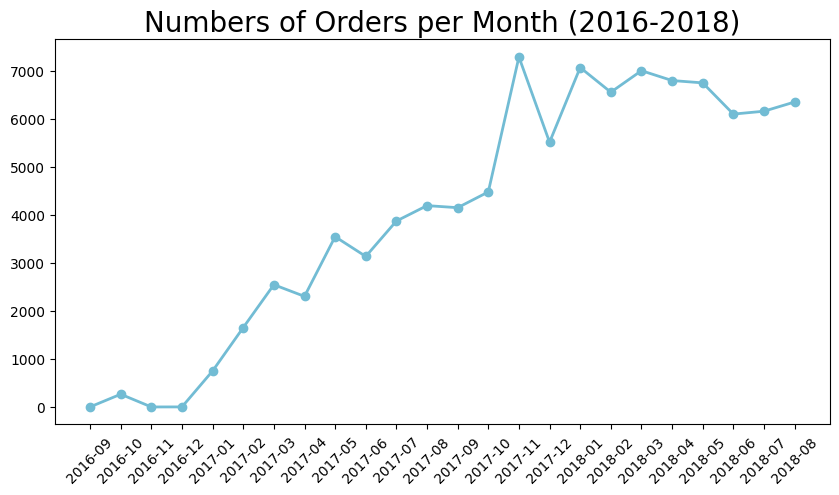

In [64]:
# Ubah frekuensi dari data yang awalnya harian menjadi bulanan dalam line chart
monthly_orders_df = all_df.resample(rule = "M", on = 'order_purchase_timestamp_x').agg({
    "order_id" : "nunique",
    "payment_value" : "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns = {
    "order_id" : "order_count",
    "payment_value" : "revenue"
}, inplace = True)

plt.figure(figsize = (10,5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp_x"],
    monthly_orders_df["order_count"],
    marker = "o",
    linewidth = 2,
    color = "#72BCD4")
plt.title("Numbers of Orders per Month (2016-2018)", loc = "center", fontsize = 20)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

**Insight**:

**Tahun 2018**

Berdasarkan visualisasi di atas, kita dapat melihat bahwa dari Januari 2018 hingga Desember 2018 jumlah order yang awalnya turun pada bulan februari dengna total order sebanyak 6555 yang pada awalnya bulan januari sebesar 7069, lalu menjadi naik lagi dibulan maret sebesar 7003, lalu turun lagi hingga bulan juni, lalu perlahan naik hingga bulan agustus.

Pada januari sebesar 7069 dan pada agustus sebesar 6351. **Jumlah order menurun sekitar 10.16% dari bulan januari ke agustus**

7069 - 6351 = 718

718/7069 x 100 = 10.16%



**Tahun 2017**

**Dan jika dibandingkan dengan tahun 2017 pada bulan januari yang memiliki jumlah order sebanyak 750 ke agustus yang memiliki jumlah order sebanyak 4193, pada tahun ini jumlah order mengalami kenaikan sebesar 458%**

4193 - 750 = 3443

3443/750 x 100 = 458%

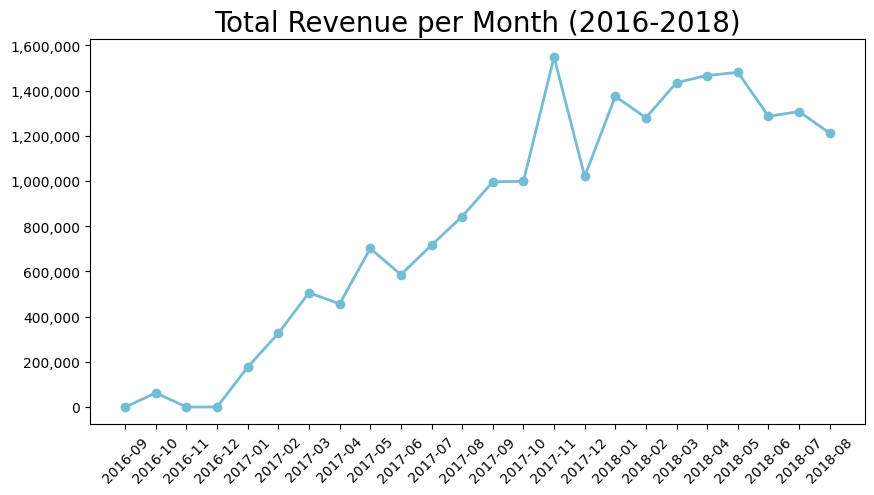

In [65]:
import matplotlib.ticker as ticker

# Line chart total revenue
plt.figure(figsize = (10,5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp_x"],
    monthly_orders_df["revenue"],
    marker = "o",
    linewidth = 2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc = "center", fontsize = 20)
plt.xticks(fontsize = 10, rotation = 45)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**Insight**:

Dapat dilihat pada visualisasi diatas, bahwa
- Pada tahun 2017 dari bulan januari yang memiliki revenue sebesar 176491.49 ke agustus sebesar 842689.94. Terlihat terjadi kenaikan sebesar 377.4%
- Pada tahun 2018 dari bulan januari yang memiliki revenue sebesar 1374064.02 ke agustus sebesar 1211240.09. Terlihat menurun sebesar 11.85%

### Pertanyaan 2: kategori produk apa yang paling banyak dan paling sedikit terjual?

In [66]:
# membuat sebuah dataframe baru untuk menampung informasi terkait jumlah penjualan tiap kategori produk
sum_order_category_df = all_df.groupby(by = "product_category_name_english").order_id.nunique().sort_values(ascending = False).reset_index()
sum_order_category_df.rename(columns = {
    "order_id" : "order_count",
    "product_category_name_english" : "category"
}, inplace = True)

sum_order_category_df

,category,order_count
0,bed_bath_table,10656
1,health_beauty,8647
2,sports_leisure,7530
3,computers_accessories,6530
4,furniture_decor,6307
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,7


/tmp/ipython-input-2312376459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2312376459.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


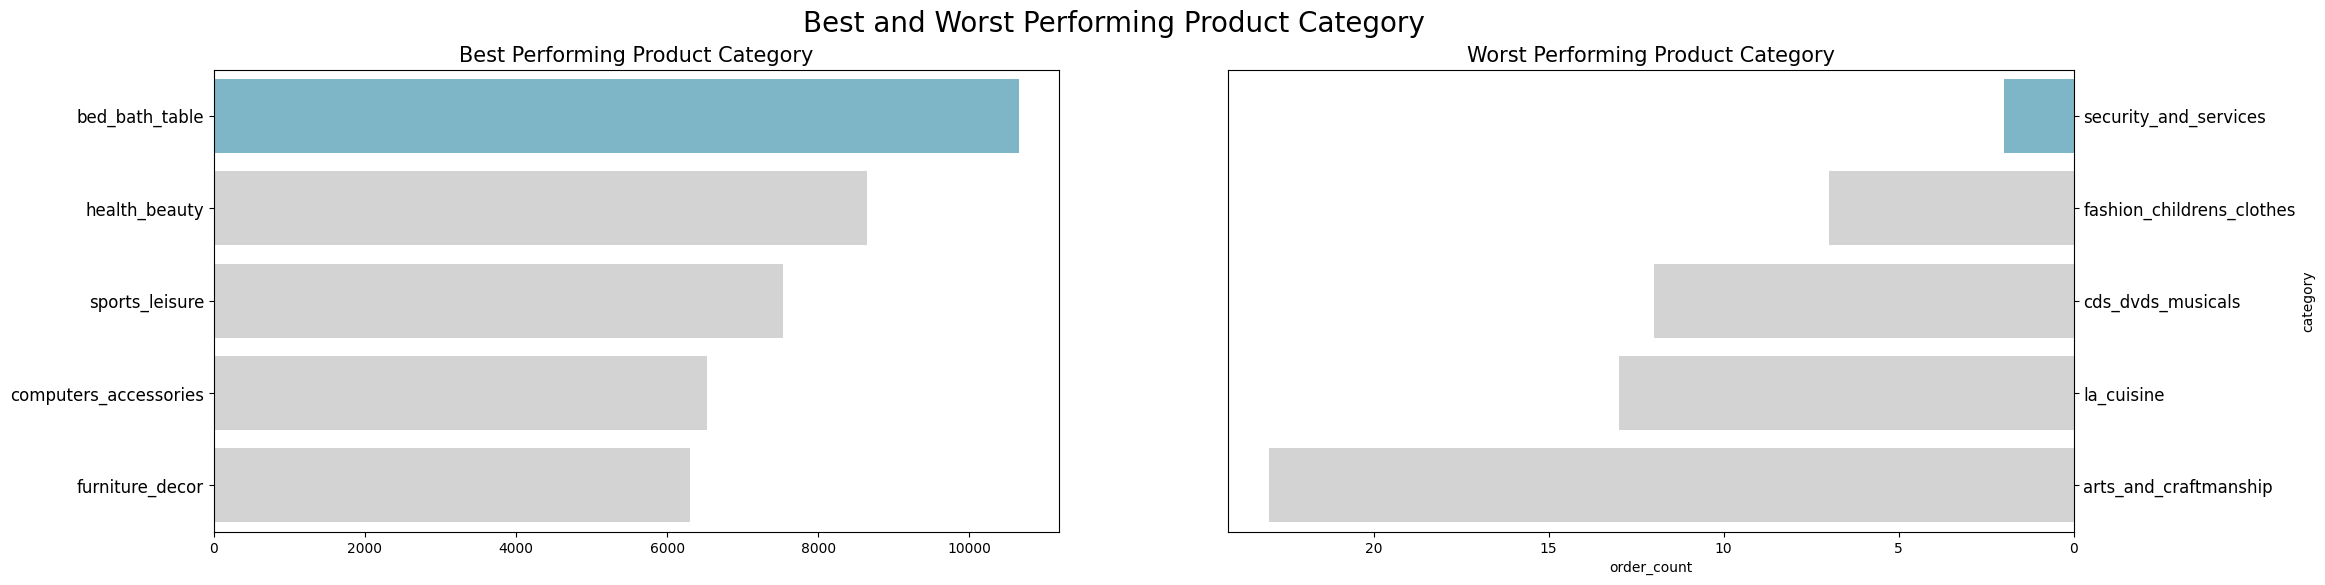

In [67]:
# Visualisasi barchart kategori produk dengan performa terbaik dan terburuk
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = "order_count",
    y = "category",
    data = sum_order_category_df.head(5),
    palette = colors,
    ax = ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product Category", loc = "center", fontsize = 15)
ax[0].tick_params(axis = "y", labelsize = 12)

sns.barplot(
    x = "order_count",
    y = "category",
    data = sum_order_category_df.sort_values(by = "order_count", ascending = True).head(5),
    palette = colors,
    ax = ax[1]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Category", loc = "center", fontsize = 15)
ax[1].tick_params(axis = "y", labelsize = 12)

plt.suptitle("Best and Worst Performing Product Category", fontsize = 20)
plt.show()

**Insight:**

Berdasarkan visualisasi diatas, dapat dilihat bahwa

- Kategori produk bed_bath_table merupakan kategori yang paling laris dengan jumlah penjualan sebanyak 10656

- Kategori produk security_and_service merupakan kategori yang paling sedikit terjual dengan jumlah penjualan sebanyak 2

### Pertanyaan 3: Bagaimana distribusi pelanggan berdasarkan state?

/tmp/ipython-input-2854126470.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2854126470.py:13: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


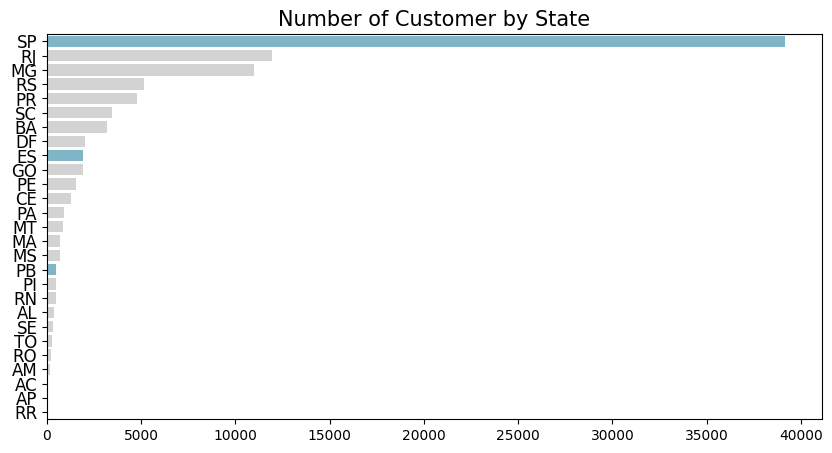

In [68]:
# Berdasarkan state
bycity_df = all_df.groupby(by = "customer_state").customer_unique_id.nunique().reset_index()

bycity_df.rename(columns = {
    "customer_unique_id" : "customer_count",
    "customer_state" : "state"
}, inplace = True)

bycity_df

plt.figure(figsize = (10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x = "customer_count",
    y = "state",
    data = bycity_df.sort_values(by = "customer_count", ascending = False),
    palette = colors_
)
plt.title("Number of Customer by State", loc = "center", fontsize = 15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis = 'y', labelsize = 12)
plt.show()

**Insight**:

Berdasarkan visualisasi diatas, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian (state) bagian SP (sao paulo.)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1

Tren penjualan Olist pada tahun 2018 menunjukkan adanya fluktuasi jumlah order dan revenue. Jumlah order sempat menurun dari Januari (7069 order) ke Februari (6555 order), kemudian naik kembali di bulan Maret (7003 order), dan kembali turun hingga Juni sebelum sedikit meningkat kembali pada Agustus (6351 order). Secara keseluruhan, jumlah order dari Januari ke Agustus 2018 mengalami penurunan sekitar 10,16%. Jika dibandingkan dengan tahun sebelumnya, Januari 2017 (750 order) ke Agustus 2017 (4193 order), justru terdapat kenaikan yang sangat signifikan sebesar 458%. Dari sisi revenue, tahun 2017 menunjukkan pertumbuhan positif dari Rp176.491,49 pada Januari menjadi Rp842.689,94 pada Agustus (naik 377,4%). Sebaliknya, tahun 2018 justru menurun dari Rp1.374.064,02 pada Januari ke Rp1.211.240,09 pada Agustus, atau turun sekitar 11,85%. Hal ini menunjukkan bahwa performa penjualan Olist pada 2018 relatif stagnan bahkan menurun dibandingkan pertumbuhan pesat pada 2017.


- Conclusion pertanyaan 2

Kategori produk yang paling laris pada Olist adalah bed_bath_table, dengan total penjualan mencapai 10.656 produk, menunjukkan tingginya permintaan pada kategori kebutuhan rumah tangga. Sebaliknya, kategori security_and_service menjadi kategori yang paling jarang terjual, hanya mencatat 2 penjualan sepanjang periode analisis. Hal ini menunjukkan adanya perbedaan yang sangat besar dalam daya tarik tiap kategori produk di platform Olist.


**Saran** : Pertahankan dan kembangkan kategori populer seperti bed_bath_table dengan cara menambah variasi produk, memberikan bundling, atau promo eksklusif karena terbukti memiliki permintaan tinggi.

Optimalkan kategori dengan penjualan rendah seperti security_and_service melalui evaluasi: apakah kategori ini kurang relevan dengan target pasar, atau hanya kurang promosi? Jika potensial, bisa didukung dengan edukasi manfaat produk & promosi khusus; jika tidak potensial, bisa dipertimbangkan untuk dialihkan ke kategori lain yang lebih laku.

- Conclusion pertanyaan 3

Distribusi pelanggan berdasarkan wilayah menunjukkan bahwa sebagian besar pelanggan Olist berasal dari State São Paulo (SP), yang sekaligus merupakan pusat ekonomi terbesar di Brasil. Sementara itu, state dengan jumlah pelanggan paling sedikit adalah Roraima (RR). Hal ini menegaskan bahwa konsentrasi pelanggan Olist masih terpusat di wilayah perkotaan besar, khususnya São Paulo, sedangkan di wilayah utara atau terpencil jumlah pelanggan relatif kecil.

Saran : Perkuat penetrasi di daerah dengan basis pelanggan besar seperti São Paulo (SP) dengan layanan logistik lebih cepat, pengiriman gratis, atau promo khusus pelanggan SP.

Perluas pasar di daerah dengan pelanggan rendah (contoh: Roraima/RR) dengan strategi targeted marketing, subsidi ongkir, atau kolaborasi dengan mitra logistik lokal agar pembeli lebih tertarik.

In [69]:
# Dowload all_df
all_df.to_csv("all_data.csv", index=False)